In [2]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
raw

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]      # using a list comprehension to extract the first entry for each tuple in 
    df.columns = outer                       # the multi-index from .columns ^above^
    return df                                        

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

def tweak_data():
    raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
                    
    return(raw
     .iloc[:, :-2:2] # :-2:2 takes out volume, ::2 leaves volume in
     .pipe(fix_cols)
)
                      
tweak_data()


# TO define apple data
aapl = (raw
        .iloc[:,::2]
        .pipe(fix_cols))
aapl

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.505281,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.516528,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.412873,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.443573,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200


## Accumulation/Distribution Indicator (A/D)

In [4]:
(aapl
 .assign(mfm=((aapl.Close - aapl.Low) - (aapl.High - aapl.Close))/(aapl.High - aapl.Low),
         mfv = lambda df_:df_.mfm * df_.Volume,
         cmfv = lambda df_:df_.mfv.cumsum())
)

#cmfv is the A/D column

,Adj Close,Close,High,Low,Open,Volume,mfm,mfv,cmfv
Date,,,,,,,,,
2010-01-04,6.505281,7.643214,7.660714,7.585000,7.622500,493729600,0.537737,2.654966e+08,2.654966e+08
2010-01-05,6.516528,7.656429,7.699643,7.616071,7.664286,601904800,-0.034183,-2.057486e+07,2.449217e+08
2010-01-06,6.412873,7.534643,7.686786,7.526786,7.656429,552160000,-0.901784,-4.979289e+08,-2.530072e+08
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200,0.037280,1.778734e+07,-2.352198e+08
2010-01-08,6.443573,7.570714,7.571429,7.466429,7.510714,447610800,0.986385,4.415166e+08,2.062968e+08
...,...,...,...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000,0.871134,8.586944e+07,2.265167e+10
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,0.370533,1.796298e+07,2.266963e+10
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,0.973482,9.065182e+07,2.276029e+10


<AxesSubplot:xlabel='Date'>

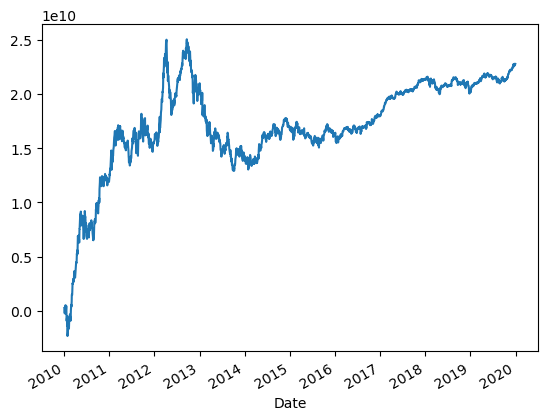

In [6]:
# Now refactoring into a function called 'calc_ad'

def calc_ad(df, close_col='Close', low_col='Low', high_col='High',
            vol_col='Volume'):
    close = df[close_col]
    low = df[low_col]
    high = df[high_col]
    return (df
            .assign(mfm=((close - low) - (high - close)) / (high - low),
                    mfv = lambda df_:df_.mfm * df_[vol_col],  # still using lambda because we need access to the mfm column
                    cmfv = lambda df_:df_.mfv.cumsum())       # these lines are NOT python code, rather they are Pandas
            .cmfv
           )

(aapl
 .assign(ad = calc_ad)
 .ad
 .plot()
)

# ^to plot the new 'ad' column

In [ ]:
fig = plt.figure(figsize=(10,8))
